In [19]:
import qlib
import pandas as pd
from qlib.constant import REG_CN
from qlib.contrib.data.handler import Alpha360,Alpha158
qlib.init(provider_uri='./qlib_data/qlib_bin', region=REG_CN)

[22052:MainThread](2025-06-07 16:06:29,153) INFO - qlib.Initialization - [config.py:420] - default_conf: client.
[22052:MainThread](2025-06-07 16:06:29,159) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[22052:MainThread](2025-06-07 16:06:29,159) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('E:/MYRL/tutorial/qlib_data/qlib_bin')}


In [34]:
train_data_config = {
    "start_time": "2025-01-01",
    "end_time": "2025-04-01",
    "fit_start_time": "2025-01-01",
    "fit_end_time": "2025-04-01",
    "instruments": "csi300",
    "infer_processors": [
        "DropnaProcessor",
        "CSZFillna",
        "MinMaxNorm"
    ],
    "learn_processors": [
        "DropnaProcessor",
        "CSZFillna",
        "MinMaxNorm"
    ],
    "label":(["$close"], ["PRICE"]),
}
test_data_config = {
    "start_time": "2025-04-08",
    "end_time": "2025-06-06",
    "fit_start_time": "2025-04-08",
    "fit_end_time": "2025-06-06",
    "instruments": "csi300",
    "infer_processors": [
        "DropnaProcessor",
        "CSZFillna",
        "MinMaxNorm"

    ],
    "learn_processors": [
        "DropnaProcessor",
        "CSZFillna",
        "MinMaxNorm"
    ],
    "label":(["$close"], ["PRICE"]),
}
train_data = Alpha158(**train_data_config)
test_data = Alpha158(**test_data_config)

[22052:MainThread](2025-06-07 16:30:28,732) INFO - qlib.timer - [log.py:127] - Time cost: 35.470s | Loading data Done
[22052:MainThread](2025-06-07 16:30:28,751) INFO - qlib.timer - [log.py:127] - Time cost: 0.010s | DropnaProcessor Done
d:\ProgramData\anaconda3\envs\nlpgettingstarted\Lib\site-packages\qlib\data\dataset\processor.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].groupby("datetime", group_keys=False).apply(lambda x: x.fillna(x.mean()))
[22052:MainThread](2025-06-07 16:30:30,145) INFO - qlib.timer - [log.py:127] - Time cost: 1.393s | CSZFillna Done
[22052:MainThread](2025-06-07 16:30:30,206) INFO - qlib.timer - [log.py:127] - Time cost: 0.060s | MinMaxNorm Done
[22052:MainThread](2025-06-07 16:30:30,223) INF

# train model

In [ ]:
stock_ids = ['SH600000', 'SH600009', 'SH600010', 'SH600011', 'SH600015', 'SH600016', 'SH600018', 'SH600019', 'SH600023', 'SH600025']

['SH600000', 'SH600009', 'SH600010', 'SH600011', 'SH600015', 'SH600016', 'SH600018', 'SH600019', 'SH600023', 'SH600025', 'SH600026', 'SH600027', 'SH600028', 'SH600029', 'SH600030', 'SH600031', 'SH600036', 'SH600039', 'SH600048', 'SH600050', 'SH600061', 'SH600066', 'SH600085', 'SH600089', 'SH600104', 'SH600111', 'SH600115', 'SH600150', 'SH600160', 'SH600161', 'SH600176', 'SH600183', 'SH600188', 'SH600196', 'SH600219', 'SH600233', 'SH600276', 'SH600309', 'SH600332', 'SH600346', 'SH600362', 'SH600372', 'SH600377', 'SH600406', 'SH600415', 'SH600426', 'SH600436', 'SH600438', 'SH600460', 'SH600482', 'SH600489', 'SH600515', 'SH600519', 'SH600547', 'SH600570', 'SH600584', 'SH600585', 'SH600588', 'SH600600', 'SH600660', 'SH600674', 'SH600690', 'SH600741', 'SH600745', 'SH600760', 'SH600795', 'SH600803', 'SH600809', 'SH600845', 'SH600875', 'SH600886', 'SH600887', 'SH600893', 'SH600900', 'SH600905', 'SH600918', 'SH600919', 'SH600926', 'SH600938', 'SH600941', 'SH600958', 'SH600989', 'SH600999', 'SH

In [ ]:
import torch.nn as nn
import numpy as np
import torch
from gym import spaces
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv

In [131]:
'SH600300' in stock_ids

False

In [133]:
features = []
prices = []
dates = sorted(train_data.index.get_level_values(0).unique())
feature_cols = [col for col in train_data.columns if col != 'label']
num_features = len(feature_cols)
num_stocks = len(stock_ids)
# 遍历每个日期
for date in dates:
    # 获取当日数据
    daily_data = train_data.xs(date, level=0, drop_level=False)

    # 初始化当日特征和价格数组
    daily_features = np.zeros((num_stocks, num_features))
    daily_prices = np.ones(num_stocks)  # 默认价格为1.0

    # 标记哪些股票有有效数据
    valid_stocks = np.zeros(num_stocks, dtype=bool)

    # 遍历每只股票
    for i, stock in enumerate(stock_ids):
        # 检查股票是否在当日数据中
        if stock in daily_data.index:
            stock_row = daily_data.loc[stock]

            # 提取特征
            stock_features = stock_row[feature_cols].values

            # 检查特征是否有效（不包含NaN）
            if not np.isnan(stock_features).any():
                daily_features[i] = stock_features
                valid_stocks[i] = True

                # 提取价格（假设label是收益率）
                if 'label' in stock_row.index and not pd.isna(stock_row['label']):
                    daily_prices[i] = 1.0 + stock_row['label']
    features.append(daily_features.flatten())
    prices.append(daily_prices)


# 转换为numpy数组
features = np.array(features)
prices = np.array(prices)

print(f"提取完成: {num_stocks} 只股票, {num_features} 个特征")
print(f"特征数组形状: {features.shape}")
print(f"价格数组形状: {prices.shape}")



提取完成: 300 只股票, 159 个特征
特征数组形状: (53, 47700)
价格数组形状: (53, 300)


In [134]:
## 定义交易环境

class TradingEnv(gym.Env):
    """自定义交易环境，基于Gym接口"""

    def __init__(self, config):
        super(TradingEnv, self).__init__()

        # 从配置中获取数据
        self.data = config["data"]
        self.initial_capital = config.get("initial_capital", 1000000)
        self.transaction_cost = config.get("transaction_cost", 0.001)
        self.position_limit = config.get("position_limit", 1.0)

        # 状态维度（特征数量）
        self.feature_dim = self.data["features"].shape[1]

        # 动作空间：对于每个股票，决定买入(1)、持有(0)或卖出(-1)
        self.action_space = spaces.Box(
            low=-1.0, high=1.0, shape=(len(self.data["stock_ids"]),), dtype=np.float32
        )

        # 观察空间：特征 + 当前持仓 + 账户余额
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.feature_dim + len(self.data["stock_ids"]) + 1,),
            dtype=np.float32
        )

        # 重置环境
        self.reset()

    def reset(self):
        """重置环境状态"""
        self.current_step = 0
        self.capital = self.initial_capital
        self.positions = np.zeros(len(self.data["stock_ids"]))
        self.total_assets_history = [self.initial_capital]
        self.actions_history = []

        # 返回初始观察
        return self._get_observation()

    def _get_observation(self):
        """获取当前观察"""
        features = self.data["features"][self.current_step]
        observation = np.concatenate([
            features,
            self.positions,
            [self.capital]
        ])
        return observation

    def step(self, action):
        """执行一步动作并返回新的状态、奖励、是否结束等信息"""
        # 保存动作
        self.actions_history.append(action)

        # 获取当前价格
        current_prices = self.data["prices"][self.current_step]

        # 计算当前资产价值
        current_assets = self.capital + np.sum(self.positions * current_prices)

        # 执行交易动作
        for i, a in enumerate(action):
            # 计算交易数量
            trade_amount = a * self.position_limit * self.capital / len(action)

            # 执行交易（买入为正，卖出为负）
            shares_to_trade = trade_amount / current_prices[i]
            cost = shares_to_trade * current_prices[i] * (1 + self.transaction_cost * np.sign(shares_to_trade))

            if self.capital >= cost:  # 确保有足够的资金
                self.positions[i] += shares_to_trade
                self.capital -= cost

        # 移动到下一步
        self.current_step += 1
        done = self.current_step >= len(self.data["features"]) - 1

        # 获取下一个价格
        next_prices = self.data["prices"][self.current_step]

        # 计算新的资产价值
        new_assets = self.capital + np.sum(self.positions * next_prices)

        # 计算奖励（资产变化百分比）
        reward = (new_assets - current_assets) / current_assets

        # 记录总资产历史
        self.total_assets_history.append(new_assets)

        # 获取新的观察
        obs = self._get_observation()

        return obs, reward, done, {"assets": new_assets}

In [135]:
## 定义特征提取器和策略网络
# 定义特征提取器
class TradingFeatureExtractor(nn.Module):
    def __init__(self, observation_space: spaces.Box, feature_dim, stock_num):
        super(TradingFeatureExtractor, self).__init__()

        # 计算输入维度
        input_dim = feature_dim + stock_num + 1  # 特征 + 持仓 + 资金

        # 自定义特征提取网络
        self.extractor = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # 提取的特征维度
        self._features_dim = 64

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.extractor(observations)

    @property
    def features_dim(self) -> int:
        return self._features_dim

# 定义自定义策略网络
class TradingPolicy(ActorCriticPolicy):
    def __init__(self, *args, **kwargs):
        # 移除不兼容的参数
        feature_dim = kwargs.pop("feature_dim", 158)
        stock_num = kwargs.pop("stock_num", 300)

        # 设置自定义特征提取器
        kwargs["features_extractor_class"] = TradingFeatureExtractor
        kwargs["features_extractor_kwargs"] = {
            "feature_dim": feature_dim,
            "stock_num": stock_num
        }

        # 调用父类构造函数
        super(TradingPolicy, self).__init__(*args, **kwargs)

In [136]:
## 训练模型
# 创建训练数据字典
train_env_config = {
    "data": {
        "features": features,
        "prices": prices,
        "stock_ids": stock_ids
    },
    "initial_capital": 1000000,
    "transaction_cost": 0.001,
    "position_limit": 0.1
}

In [137]:

# 创建环境工厂函数
def make_env():
    return TradingEnv(train_env_config)

# 创建向量化环境
env = DummyVecEnv([make_env])
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10., clip_reward=10.)

# 4. 调整PPO参数，增加数值稳定性
model = PPO(
    TradingPolicy,
    env,
    learning_rate=5e-5,  # 降低学习率
    n_steps=1024,        # 减少每步采样数
    batch_size=32,       # 减小批次大小
    n_epochs=5,          # 减少训练轮次
    gamma=0.95,          # 降低折扣因子
    clip_range=0.2,      # 调整裁剪范围
    ent_coef=0.1,       # 增加熵系数，鼓励探索
    vf_coef=0.5,         # 调整价值函数系数
    max_grad_norm=0.5,   # 添加梯度裁剪
    verbose=1,
    policy_kwargs={
        'log_std_init': -2.0,
        "feature_dim": features.shape[1],
        "stock_num": prices.shape[1],
    }
)

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


Using cuda device


In [138]:
# 训练模型
num_timesteps = 100000
model.learn(total_timesteps=num_timesteps)
model.save("ppo_trading_model")

-----------------------------
| time/              |      |
|    fps             | 259  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 1024 |
-----------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 203       |
|    iterations           | 2         |
|    time_elapsed         | 10        |
|    total_timesteps      | 2048      |
| train/                  |           |
|    approx_kl            | 0.0717354 |
|    clip_fraction        | 0.438     |
|    clip_range           | 0.2       |
|    entropy_loss         | 174       |
|    explained_variance   | 0.114     |
|    learning_rate        | 5e-05     |
|    loss                 | 1.59      |
|    n_updates            | 5         |
|    policy_gradient_loss | -0.0968   |
|    std                  | 0.135     |
|    value_loss           | 0.00958   |
---------------------------------------
------------------------------

In [152]:
test_data = dataset.prepare("test", col_set=["feature", "label"])
test_stock_ids = test_data.index.get_level_values(1).unique().tolist()
test_data.fillna(method='ffill', inplace=True)
print(f"股票数量: {len(test_stock_ids)}")

股票数量: 299


<ipython-input-152-48c7331607a9>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [153]:
test_features = []
test_prices = []
test_dates = sorted(test_data.index.get_level_values(0).unique())
test_feature_cols = [col for col in test_data.columns if col != 'label']
test_num_features = len(test_feature_cols)
test_num_stocks = len(stock_ids)
# 遍历每个日期
for date in test_dates:
    # 获取当日数据
    daily_data = test_data.xs(date, level=0, drop_level=False)

    # 初始化当日特征和价格数组
    daily_features = np.zeros((test_num_stocks, test_num_features))
    daily_prices = np.ones(test_num_stocks)  # 默认价格为1.0

    # 标记哪些股票有有效数据
    valid_stocks = np.zeros(test_num_stocks, dtype=bool)

    # 遍历每只股票
    for i, stock in enumerate(stock_ids):
        # 检查股票是否在当日数据中
        if stock in daily_data.index:
            stock_row = daily_data.loc[stock]

            # 提取特征
            stock_features = stock_row[test_feature_cols].values

            # 检查特征是否有效（不包含NaN）
            if not np.isnan(stock_features).any():
                daily_features[i] = stock_features
                valid_stocks[i] = True

                # 提取价格（假设label是收益率）
                if 'label' in stock_row.index and not pd.isna(stock_row['label']):
                    daily_prices[i] = 1.0 + stock_row['label']
    test_features.append(daily_features.flatten())
    test_prices.append(daily_prices)


# 转换为numpy数组
test_features = np.array(test_features)
test_prices = np.array(test_prices)

print(f"提取完成: {test_num_stocks} 只股票, {test_num_features} 个特征")
print(f"特征数组形状: {test_features.shape}")
print(f"价格数组形状: {test_prices.shape}")



# 创建测试环境
test_env_config = {
    "data": {
        "features": test_features,
        "prices": test_prices,
        "stock_ids": stock_ids
    },
    "initial_capital": 1000000,
    "transaction_cost": 0.001,
    "position_limit": 0.1
}

# 创建测试环境
test_env = TradingEnv(test_env_config)

# 使用训练好的模型进行回测
obs = test_env.reset()
done = False
total_reward = 0
assets_history = [1000000]

while not done:
    # 使用模型预测动作
    action, _ = model.predict(obs, deterministic=True)

    # 执行动作
    obs, reward, done, info = test_env.step(action)
    total_reward += reward
    assets_history.append(info["assets"])



提取完成: 300 只股票, 159 个特征
特征数组形状: (40, 47700)
价格数组形状: (40, 300)


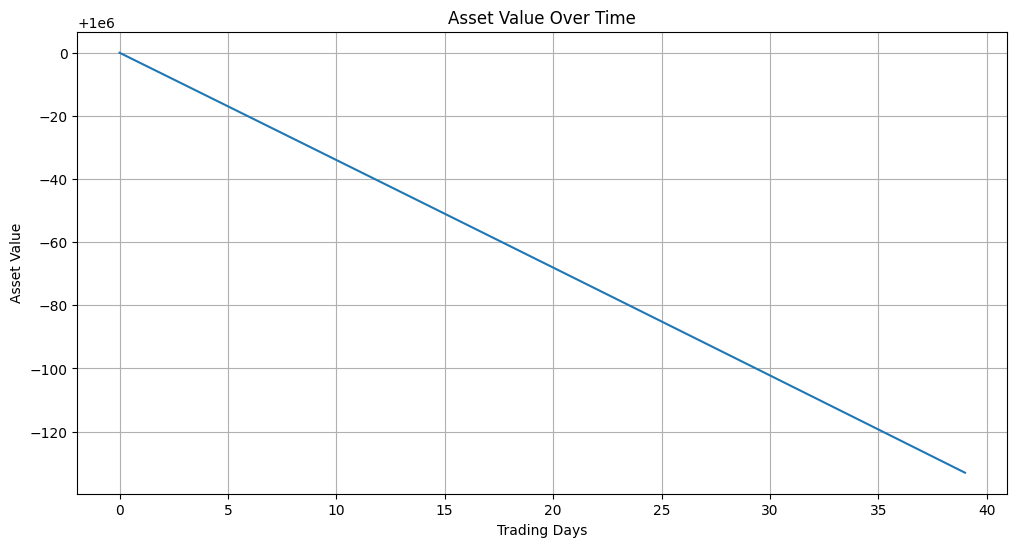

In [154]:
import matplotlib.pyplot as plt
# 绘制资产变化曲线
plt.figure(figsize=(12, 6))
plt.plot(assets_history)
plt.title('Asset Value Over Time')
plt.xlabel('Trading Days')
plt.ylabel('Asset Value')
plt.grid(True)
plt.show()

In [156]:
print("建议卖出")
stocksorted = np.argsort(action)
i = 0
while True:
    if i<10:
        print(stock_ids[stocksorted[i]],action[stocksorted[i]])
        i += 1
    else:
        break

print("\n建议买入")
i = -1
while True:
    if i>-10:
        print(stock_ids[stocksorted[i]],action[stocksorted[i]])
        i -= 1
    else:
        break

要买入
SZ002311 -0.1468766
SH688008 -0.10182352
SZ002352 -0.101026505
SH600377 -0.09486002
SH688082 -0.090776704
SH601766 -0.09005927
SZ000425 -0.08928756
SH601127 -0.08497596
SH600803 -0.08088371
SZ000977 -0.07775721
要卖出
SH600000 0.14342423
SZ002736 0.11879723
SZ000301 0.107358985
SZ002074 0.106314495
SH601186 0.10507932
SH600741 0.07983707
SZ002001 0.07526893
SZ000625 0.07410166
SH601006 0.073706724


In [111]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
!cp /content/ppo_trading_model.zip /content/drive/MyDrive

In [155]:
while True:
    stocktosearch = input()
    for i in range(len(test_stock_ids)):
        if test_stock_ids[i] in stocktosearch or stocktosearch in test_stock_ids[i]:
            suggest = "一般般"
            if action[i] <-0.1 :suggest = "建议买入"
            if action[i] >0.1 :suggest = "建议卖出"
            print(test_stock_ids[i],suggest,   '\tdebug: ',action[i])


KeyboardInterrupt: Interrupted by user